In [1]:
# MAlaria Detection using Transfer Learning

# Download The Dataset from 
#https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
import glob
train_path = glob.glob("/content/drive/My Drive/Complete Projects/Malaria-Detection-master/Dataset/Train")
valid_path = glob.glob("/content/drive/My Drive/Complete Projects/Malaria-Detection-master/Dataset/Test")

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
# useful for getting number of classes
folders = glob.glob('/content/drive/My Drive/Complete Projects/Malaria-Detection-master/Dataset/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [9]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Malaria-Detection-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 416 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
13/13 [==============================] - 383s 28s/step - loss: 1.2319 - accuracy: 0.5643 - val_loss: 0.6572 - val_accuracy: 0.6791
Epoch 2/5
13/13 [==============================] - 347s 27s/step - loss: 0.6308 - accuracy: 0.6430 - val_loss: 0.6943 - val_accuracy: 0.6269
Epoch 3/5
13/13 [==============================] - 347s 27s/step - loss: 0.4081 - accuracy: 0.8006 - val_loss: 0.4648 - val_accuracy: 0.7687
Epoch 4/5
13/13 [==============================] - 346s 27s/step - loss: 0.3414 - accuracy: 0.8652 - val_loss: 0.4307 - val_accuracy: 0.7313
Epoch 5/5
13/13 [==============================] - 347s 27s/step - loss: 0.3899 - accuracy: 0.8204 - val_loss: 0.7117 - val_accuracy: 0.6269


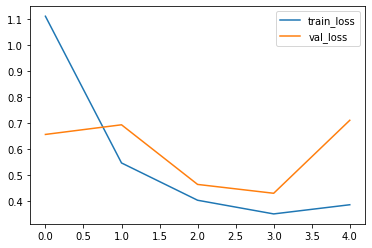

<Figure size 432x288 with 0 Axes>

In [19]:
# loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

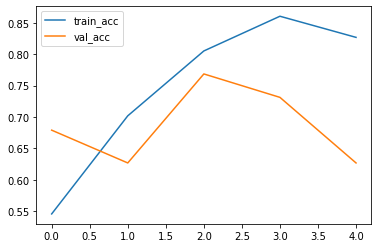

<Figure size 432x288 with 0 Axes>

In [20]:
# accuracies
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')